## Машинное обучение 1, ММП ВМК МГУ

## Семинар 1

Афанасьев Глеб, Евгений Соколов

## Машинное обучение: основные понятия

### Задача машинного обучения - написать алгоритм, способный самостоятельно обучаться и  настраиваться на решение конкретной задачи.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
x_train = np.sort(np.random.rand(50))*10 - 5
y_train = x_train**2
x_train += 18
y_train += 128.5

In [ ]:
x_train, y_train

(array([13.3086626 , 13.33574332, 13.41203692, 13.72115439, 13.92834359,
        14.21128857, 14.24039472, 14.42014219, 14.8122632 , 15.63391506,
        15.79792307, 16.21915425, 16.44823462, 16.57791932, 17.15789531,
        17.86701079, 17.93525565, 18.11979882, 18.13490591, 18.15409788,
        18.16515137, 18.17265749, 18.28186834, 18.58861008, 18.70097394,
        19.3317504 , 19.41635887, 19.58210101, 19.69556604, 19.78520755,
        20.19240365, 20.30024077, 20.44154991, 20.86502704, 20.94652397,
        21.15919253, 21.20080828, 21.25394094, 21.53980468, 21.65232751,
        21.6704985 , 21.71905968, 21.75998462, 21.78725759, 22.04856095,
        22.10515414, 22.57398638, 22.70548488, 22.79837775, 22.93701094]),
 array([150.50864663, 150.25529041, 149.54940523, 146.80851977,
        145.07838592, 142.85433433, 142.63463188, 141.31538195,
        138.66166589, 134.09835793, 133.34914283, 131.67141158,
        130.90797578, 130.52231347, 129.2091403 , 128.51768613,
        128.

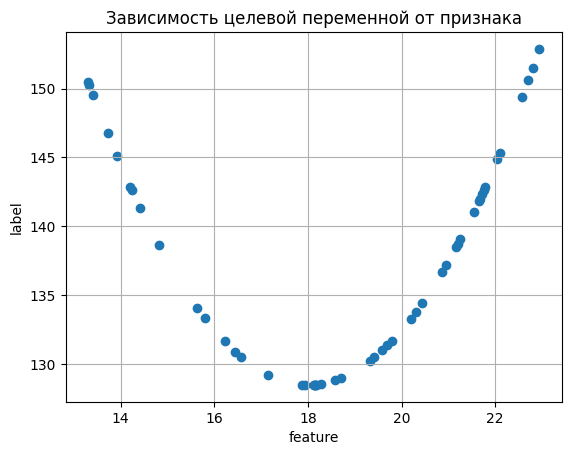

In [ ]:
plt.scatter(x_train, y_train)
plt.xlabel('feature')
plt.ylabel('label')
plt.title('Зависимость целевой переменной от признака')
plt.grid()
plt.show()

In [ ]:
x_test = np.array([0, 21, 26, -15.7])

y_test = ?

-

-

-

-

-

-

-

-

-

-

#### Простое решение - использовать силу матана!

Пусть уравнение параболы $ y = ax^2 + bx + c$

Выбираем 3 точки, подставляем и решаем СЛАУ.

**Или**

Известно что x - координата вершины равняется $\frac{-b}{2a}$

Случайно выбираем 2 точки, подставляем и решаем СЛАУ.

**Или**

 Любой другой метод.

 В любом случае, еси вы смогли его запрограммировать, то поздравляю. Вы написали алгоритм машинного обучения!

#### **Пример простой но удовлетворяет всем "критериям" задачи ML**

Есть обучающая выборка X_train, Y_train, содержащая информацию о прецедентах.

Есть программа, которая на основании этих прецедентов настраивает свои внутренние параметры.

####Теперь усложним задачу. Пусть данные зашумлены.

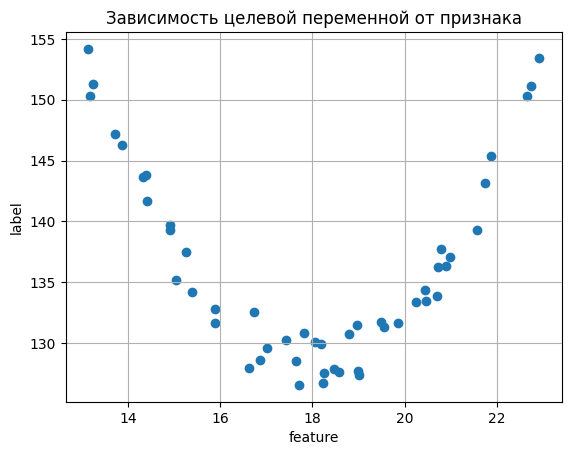

In [ ]:
x_train = np.sort(np.random.rand(50))*10 - 5
y_train = x_train**2
x_train += 18
y_train += (np.random.rand(50)*5 - 2.5)
y_train += 128.5
plt.scatter(x_train, y_train)
plt.xlabel('feature')
plt.ylabel('label')
plt.title('Зависимость целевой переменной от признака')
plt.grid()
plt.show()

Теперь мы не можем точно решить задачу. Можем лишь аппроксимировать решение с определенной точностью. Функция, по которой измеряется точность модели называется **функционал качества**. Она может быть подобрана, исходя из задачи.

Вариант решения: надо аппроксимировать полиномом с минимальным квадратичным отклонением от обучающей выборки. Ниже реализована программа для аппроксимации.

In [ ]:
def f1(x):
  ret = 0
  coefs = np.ones(3)
  x = np.array([x])
  pows = np.arange(coefs.shape[0])
  return ((x[:, np.newaxis]**pows[np.newaxis, :])*coefs[np.newaxis, :]).sum()

In [ ]:
def f(x, coefs):
  ret = 0
  pows = np.arange(coefs.shape[0])
  return ((x[:, np.newaxis]**pows[np.newaxis, :])*coefs[np.newaxis, :]).sum(1)

In [ ]:
def train_f(N, pow, x_train, y_train, lr, initial):
  coefs = initial#np.ones(pow)#random.rand
  grad = 0
  for i in range(N):
    print(i, ((f(x_train, coefs) - y_train)**2).mean())
    a = f(x_train, coefs)
    #print(2*(a - y_train)[np.newaxis, :])
    grad = 2*(a - y_train)[np.newaxis, :]*(x_train[np.newaxis, :]**np.arange(pow)[:, np.newaxis])
    grad = grad.sum(1)/x_train.shape[0]
    lambdas = minimize(lambda lam: ((f(x_train, coefs-grad*lam) - y_train)**2).sum(), np.zeros_like(coefs))['x']
#    print(lambdas)
    coefs -= grad*lambdas*lr
    #lr /= 2
    #print('lr = ', lr)
  return coefs

In [ ]:
#f(x_train, np.ones(3)) - y_train

#### Предположим что мы не знаем что это парабола. Наша задача - аппроксимировать множество точек полиномом какой-то степени. Степень подбираем самостоятельно. Параметры модели, которые инженер машинного обучения подбирает сам (то есть, они НЕ настраиваются в процессе обучения) называются **ГИПЕРПАРАМЕТРЫ**. Степень полинома в данном случае - гиперпараметр.

In [1]:
coefs = train_f(5000, 1, x_train, y_train, 0.1, np.zeros(1)) #0.001 норм

In [ ]:
coefs

array([136.21322766])

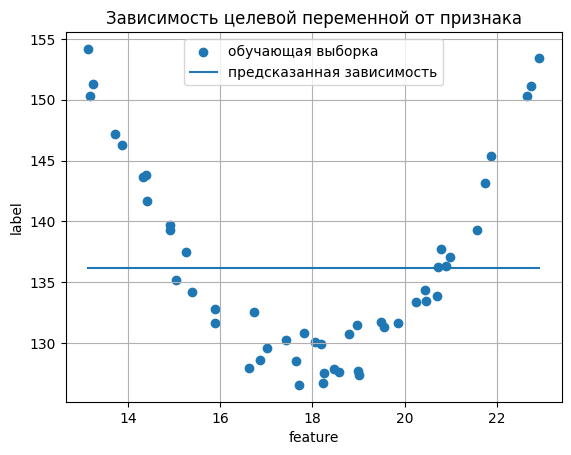

In [ ]:
plt.scatter(x_train, y_train, label='обучающая выборка')
plt.plot(x_train, f(x_train, coefs), label='предсказанная зависимость')
plt.xlabel('feature')
plt.ylabel('label')
plt.legend()
plt.title('Зависимость целевой переменной от признака')
plt.grid()
plt.show()

Мы просто аппроксимировали все точки оптимальной константой. Оптимальная константа при минимизации MSE - среднее.

In [ ]:
y_train.mean()

136.21359885658478

Модель недообучилась из-за своей неспособности подстроиться под сложные данные. Ситуация, когда модель по каким-то причинам(маленькая выборка, простая модель, недостаточно эпох обучения) не смогла выучить структуру данных **и выдает большую ошибку на обучении** называется **недообучение**.

In [2]:
coefs = train_f(500, 2, x_train, y_train, 0.1, np.zeros(2)) #0.001 норм

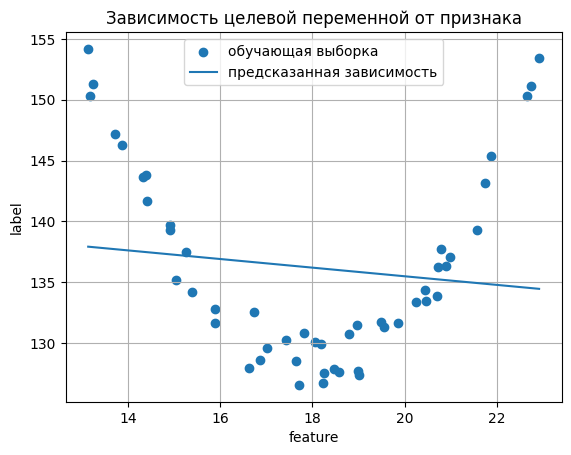

In [ ]:
plt.scatter(x_train, y_train, label='обучающая выборка')
plt.plot(x_train, f(x_train, coefs), label='предсказанная зависимость')
plt.xlabel('feature')
plt.ylabel('label')
plt.legend()
plt.title('Зависимость целевой переменной от признака')
plt.grid()
plt.show()

In [3]:
coefs = train_f(500, 3, x_train, y_train, 0.1, np.zeros(3)) #0.001 норм

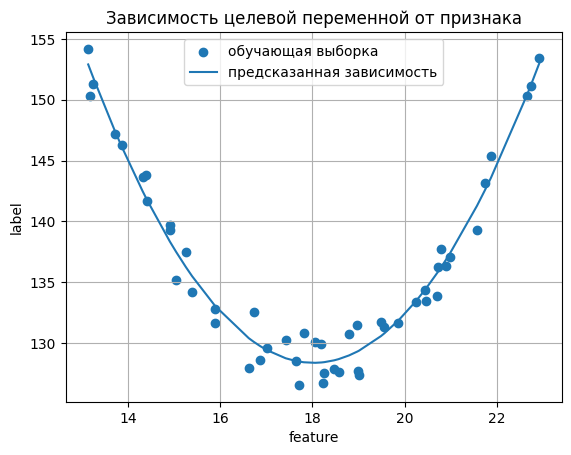

In [ ]:
plt.scatter(x_train, y_train, label='обучающая выборка')
plt.plot(x_train, f(x_train, coefs), label='предсказанная зависимость')
plt.xlabel('feature')
plt.ylabel('label')
plt.legend()
plt.title('Зависимость целевой переменной от признака')
plt.grid()
plt.show()

#### **В самый раз!**

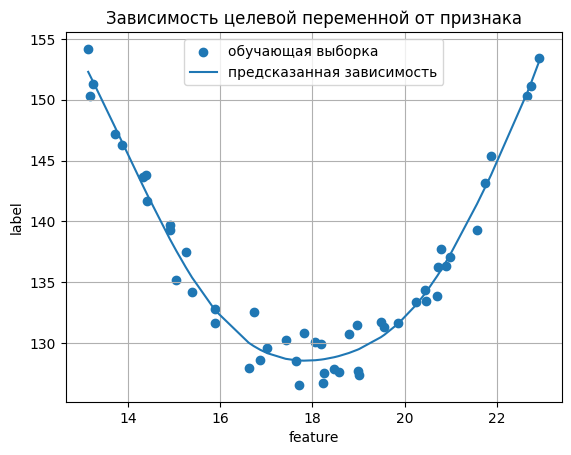

In [ ]:
from sklearn.linear_model import LinearRegression # импортируем линейную регрессию
from sklearn.preprocessing import PolynomialFeatures
X_objects = PolynomialFeatures(20).fit_transform(x_train[:, None])
regr = LinearRegression().fit(X_objects, y_train)
NewY = regr.predict(X_objects)

plt.scatter(x_train, y_train, label='обучающая выборка')
plt.plot(x_train, NewY, label='предсказанная зависимость')
plt.xlabel('feature')
plt.ylabel('label')
plt.legend()
plt.title('Зависимость целевой переменной от признака')
plt.grid()
plt.show()

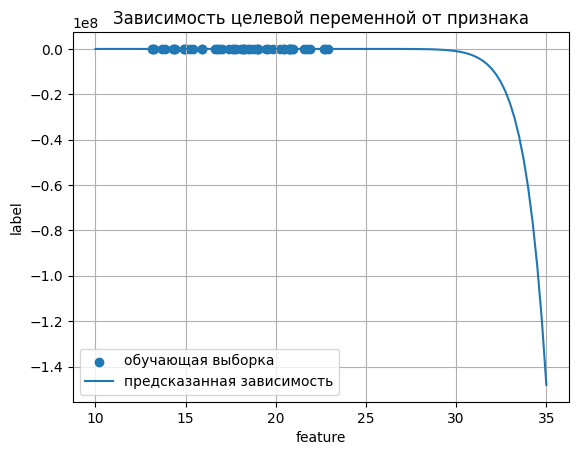

In [ ]:
X = np.linspace(10, 35, 100)
X_objects = PolynomialFeatures(20).fit_transform(X[:, None])
NewY = regr.predict(X_objects)

plt.scatter(x_train, y_train, label='обучающая выборка')
plt.plot(X, NewY, label='предсказанная зависимость')
plt.xlabel('feature')
plt.ylabel('label')
plt.legend()
plt.title('Зависимость целевой переменной от признака')
plt.grid()
plt.show()

Модель передообучилась из-за своей высокой сложности. Ситуация, когда модель по каким-то причинам(маленькая выборка, сложная модель, слишком много эпох обучения) слишком хорошо подстроилась под обучающую выборку и выдает очень маленькую ошибку на обучении, но не способна сделать верное предсказание на объектах, которые не входили в обучающую выборку называется **переобучение**.



## Работа с табличными данными

Решение любой задачи, связанной с машинным обучением, начинается с разведочного анализа данных. Перед тем, как строить модели, надо понять, сколько у нас данных и какая информация есть о каждом объекте, а также:
* выяснить, нет ли пропусков в данных (т.е. отсутствующих значений признаков у некоторых объектов)
* выяснить, нет ли выбросов (т.е. объектов, которые очень сильно отличаются от большинства, имеют неадекватные значения признаков)
* выяснить, нет ли повторов в данных
* выяснить, нет ли нелогичной информации (например, если мы анализируем данные по кредитам, и видим запись, где кредит выдали пятилетнему ребёнку, то это странно)

И это лишь небольшой список проблем, которые можно выявить. Помимо этого с данными нужно в целом познакомиться, чтобы понять, какие признаки там можно сделать, какие из них будут наиболее полезны. Обычно 80% времени специалисты тратят именно на подготовку и обработку данных.

Результатом разведочного анализа данных обычно является таблица, где каждый объект описывается набором интуитивно понятных признаков. Поэтому важно уметь работать с таблицами.


Попробуем провести разведочный анализ на реальной задаче предсказания продолжительности поездки на такси в Нью-Йорке: https://www.kaggle.com/c/nyc-taxi-trip-duration/overview

Для работы с таблицами в питоне есть специальная библиотека Pandas. Ее мы и будем использовать.

Полезные материалы по пандасу:

Полезные материалы:
1. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html)
2. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Чаще всего название библиотеки при импорте сокращают до "pd":

In [ ]:
import pandas as pd

### Разведочный анализ данных

Рассказ во многом взят из ноутбука https://www.kaggle.com/gaborfodor/from-eda-to-the-top-lb-0-367/notebook

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns

Загрузим данные и изучим доступные нам признаки.

In [ ]:
!wget  -O 'train.csv' -q 'https://www.dropbox.com/s/en5f9nhn915cnkf/_train.csv?dl=0'

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

Смысл столбцов:

* id - идентификатор поездки
* vendor_id - код провайдера, от которого пришла информация о поездке
* pickup_datetime - время старта поездки
* dropoff_datetime - время окончания поездки
* passenger_count - число пассажиров (вводится водителем)
* pickup_longitude - долгота точки посадки
* pickup_latitude - широта точки посадки
* dropoff_longitude - долгота точки высадки
* dropoff_latitude - долгота точки высадки
* store_and_fwd_flag - равно Y, если информация о поездке какое-то время хранилась в памяти таксометра из-за отсутствия связи; иначе принимает значение N
* trip_duration - продолжительность поездки в секундах

In [ ]:
train.shape

(1458644, 11)

Данных довольно много, поэтому нужно задумываться об эффективности всех вычислений. Ниже мы увидим на примере, что правильное использование возможностей pandas позволит существенно ускорить вычисления.

Посмотрим внимательно на столбцы из нашей таблицы и попробуем проверить, нет ли там противоречий и проблем. Например, в голову приходят следующие вопросы:
* можно ли считать ID уникальным идентификатором поездки, или же есть записи с одинаковыми ID?
* есть ли где-то пропуски?
* действительно ли столбец store_and_fwd_flag принимает только значения Y и N?

In [ ]:
train.id.nunique()

1458644

In [ ]:
print('Id is unique.') if train.id.nunique() == train.shape[0] else print('oops')

Id is unique.


In [ ]:
print('We do not need to worry about missing values.') if train.count().min() == train.shape[0] else print('oops')

We do not need to worry about missing values.


In [ ]:
print('The store_and_fwd_flag has only two values {}.'.format(str(set(train.store_and_fwd_flag.unique()))))

The store_and_fwd_flag has only two values {'Y', 'N'}.


In [ ]:
train.store_and_fwd_flag

0          N
1          N
2          N
3          N
4          N
          ..
1458639    N
1458640    N
1458641    N
1458642    N
1458643    N
Name: store_and_fwd_flag, Length: 1458644, dtype: object

Посмотрим на типы данных в каждом столбце.

In [ ]:
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
train.pickup_datetime[0]

'2016-03-14 17:24:55'

Видно, что pandas отнёс столбцы с датами к общему типу object. Будет лучше привести их к типу datetime, чтобы использовать удобные функции для манипуляций с датами. Заодно сделаем проверку — действительно ли столбец check_trip_duration показывает продолжительность поездки, или же он входит в противоречие со столбцами pickup_datetime и dropoff_datetime.

In [ ]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['pickup_date'] = train['pickup_datetime'].dt.date
train.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455,2016-03-14


In [ ]:
train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)
train['store_and_fwd_flag'] = 1 * (train.store_and_fwd_flag.values == 'Y')
train['check_trip_duration'] = (train['dropoff_datetime'] - train['pickup_datetime']).map(lambda x: x.total_seconds())
duration_difference = train[np.abs(train['check_trip_duration'].values  - train['trip_duration'].values) > 1]
print('Trip_duration and datetimes are ok.') if len(duration_difference[['pickup_datetime', 'dropoff_datetime', 'trip_duration', 'check_trip_duration']]) == 0 else print('Ooops.')

Trip_duration and datetimes are ok.


In [ ]:
#train.apply()

In [ ]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016-03-14,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016-06-12,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016-01-19,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016-04-06,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016-03-26,435.0


Ещё имеет смысл проверить целевую переменную trip_duration. Нет ли там выбросов? Какими по продолжительности бывают поездки? Выглядит ли распределение этой переменной осмысленно?

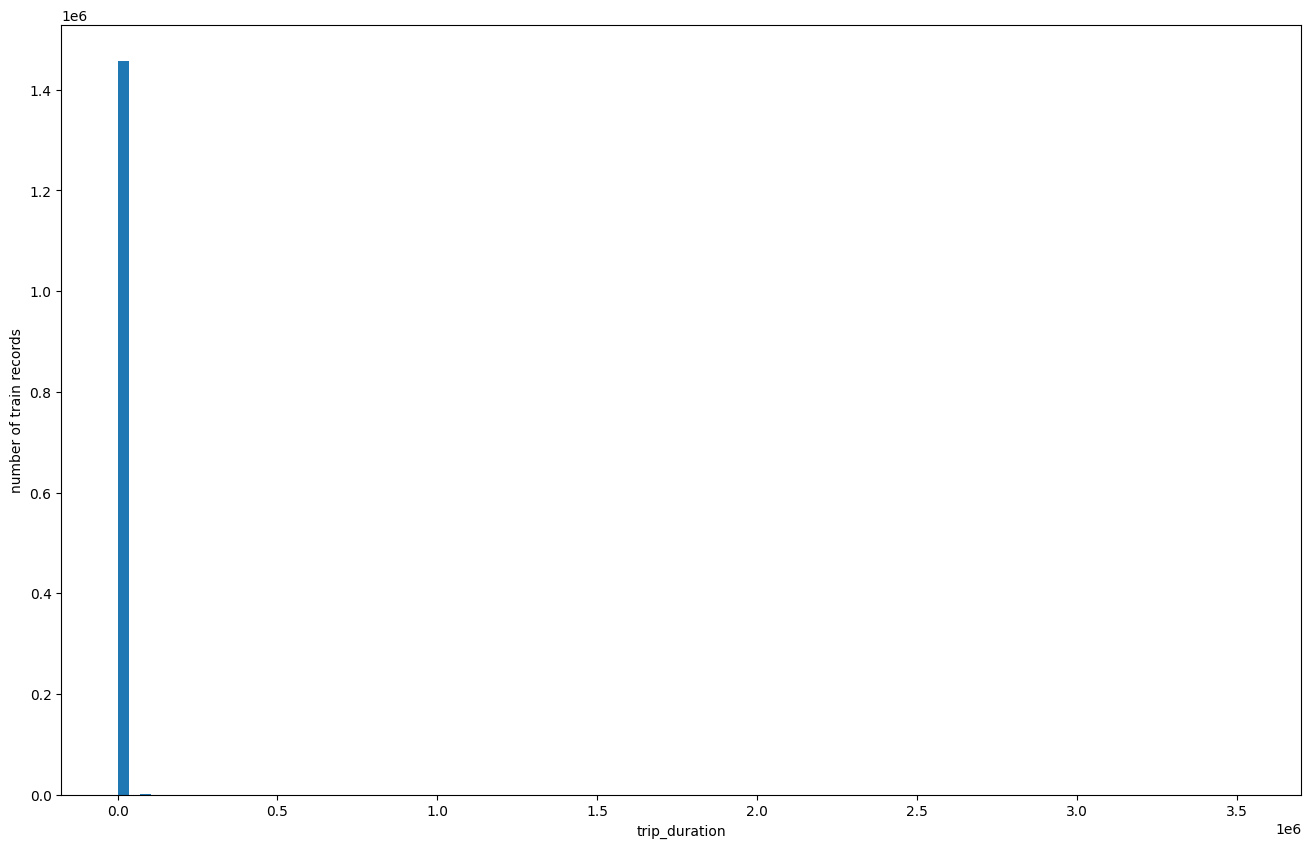

In [ ]:
plt.hist(train['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

Когда в каком-то столбце распределение имеет тяжёлые хвосты или есть выбросы, обычные гистограммы не очень информативны. В этом случае может быть полезно нарисовать распределение в логарифмической шкале.

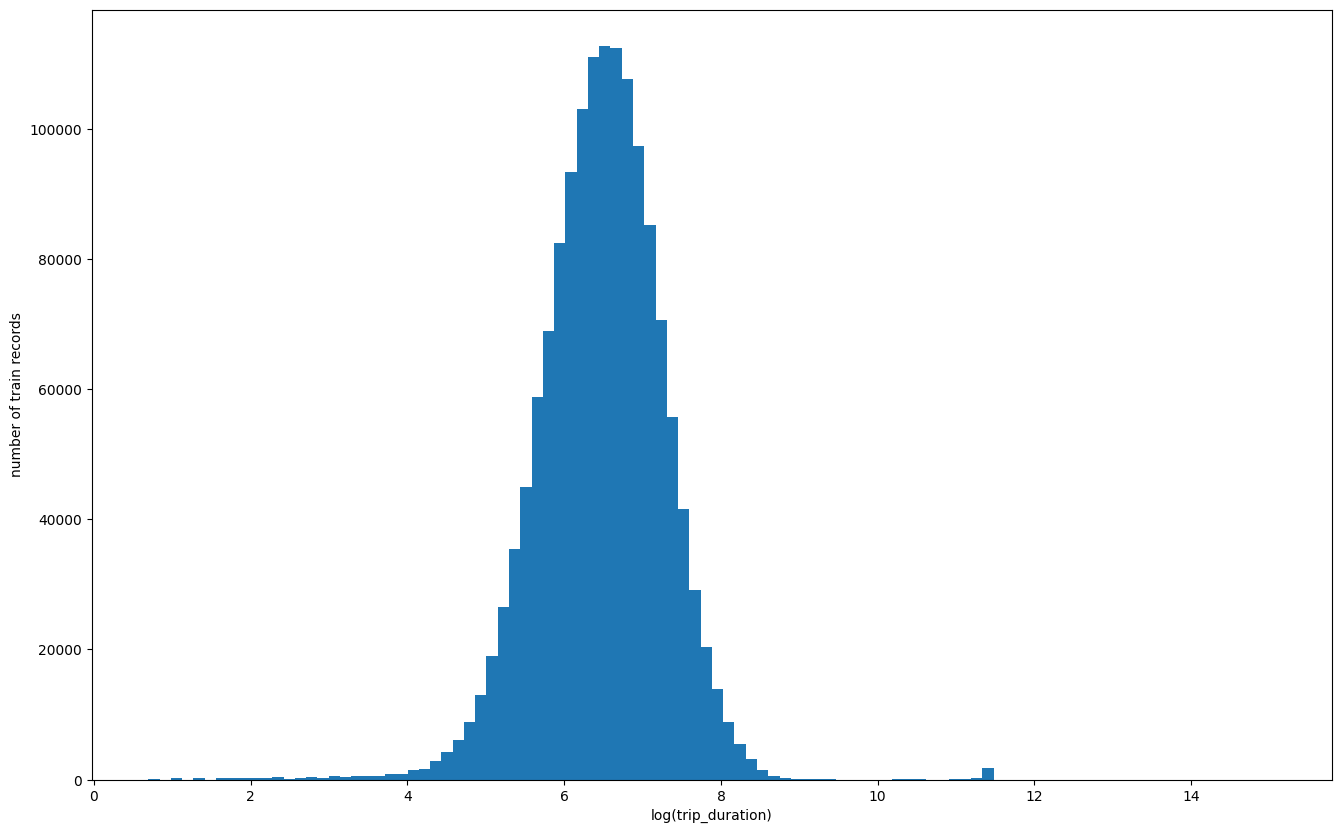

In [ ]:
train['log_trip_duration'] = np.log1p(train['trip_duration'].values)
plt.hist(train['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

В целом распределение разумное, продолжительность поездки находится примерно в следующем интервале:

In [ ]:
print("В секундах:", np.exp(5), np.exp(9))
print("В минутах:", np.exp(5) // 60, np.exp(9) // 60)

В секундах: 148.4131591025766 8103.083927575384
В минутах: 2.0 135.0


Самая длинная поездка (в часах):

In [ ]:
train['trip_duration'].max() // 3600

979

In [ ]:
train[train.trip_duration >= 979 * 3600]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration,log_trip_duration
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,0,3526282,2016-02-13,3526282.0,15.075755


Это выброс. Мог сломаться таксометр, водитель мог забыть остановить поездку по каким-то причинам и т.д. В любом случае, будет странно обучаться на таких данных, обычно их выкидывают из выборки. Кандидатов на выбрасывание не так уж много — например, если взять поездки длиной 10 часа и больше, то их окажется около двух тысяч, и определённо надо выяснять, что это такое.

In [ ]:
train[train.trip_duration >= 10 * 3600]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration,log_trip_duration
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,0,84594,2016-02-20,84594.0,11.345630
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,0,86149,2016-05-07,86149.0,11.363845
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,0,86352,2016-06-07,86352.0,11.366199
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,0,86236,2016-02-13,86236.0,11.364855
4172,id3674870,2,2016-03-18 11:54:20,2016-03-19 11:34:17,1,-73.989090,40.736992,-73.972336,40.751511,0,85197,2016-03-18,85197.0,11.352733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455097,id2798196,2,2016-03-20 03:51:36,2016-03-21 00:00:00,2,-73.969299,40.757301,-73.870277,40.709808,0,72504,2016-03-20,72504.0,11.191411
1456458,id2055880,2,2016-02-08 19:11:31,2016-02-09 19:08:44,3,-73.973282,40.760792,-73.988518,40.764210,0,86233,2016-02-08,86233.0,11.364820
1457207,id1910950,2,2016-06-08 16:29:12,2016-06-09 16:11:03,1,-73.958061,40.800869,-73.964119,40.805515,0,85311,2016-06-08,85311.0,11.354070
1457752,id1215198,2,2016-02-02 11:31:10,2016-02-03 11:29:44,6,-73.972069,40.794220,-73.961014,40.806728,0,86314,2016-02-02,86314.0,11.365759


Попробуем нарисовать, откуда обычно стартуют поездки.

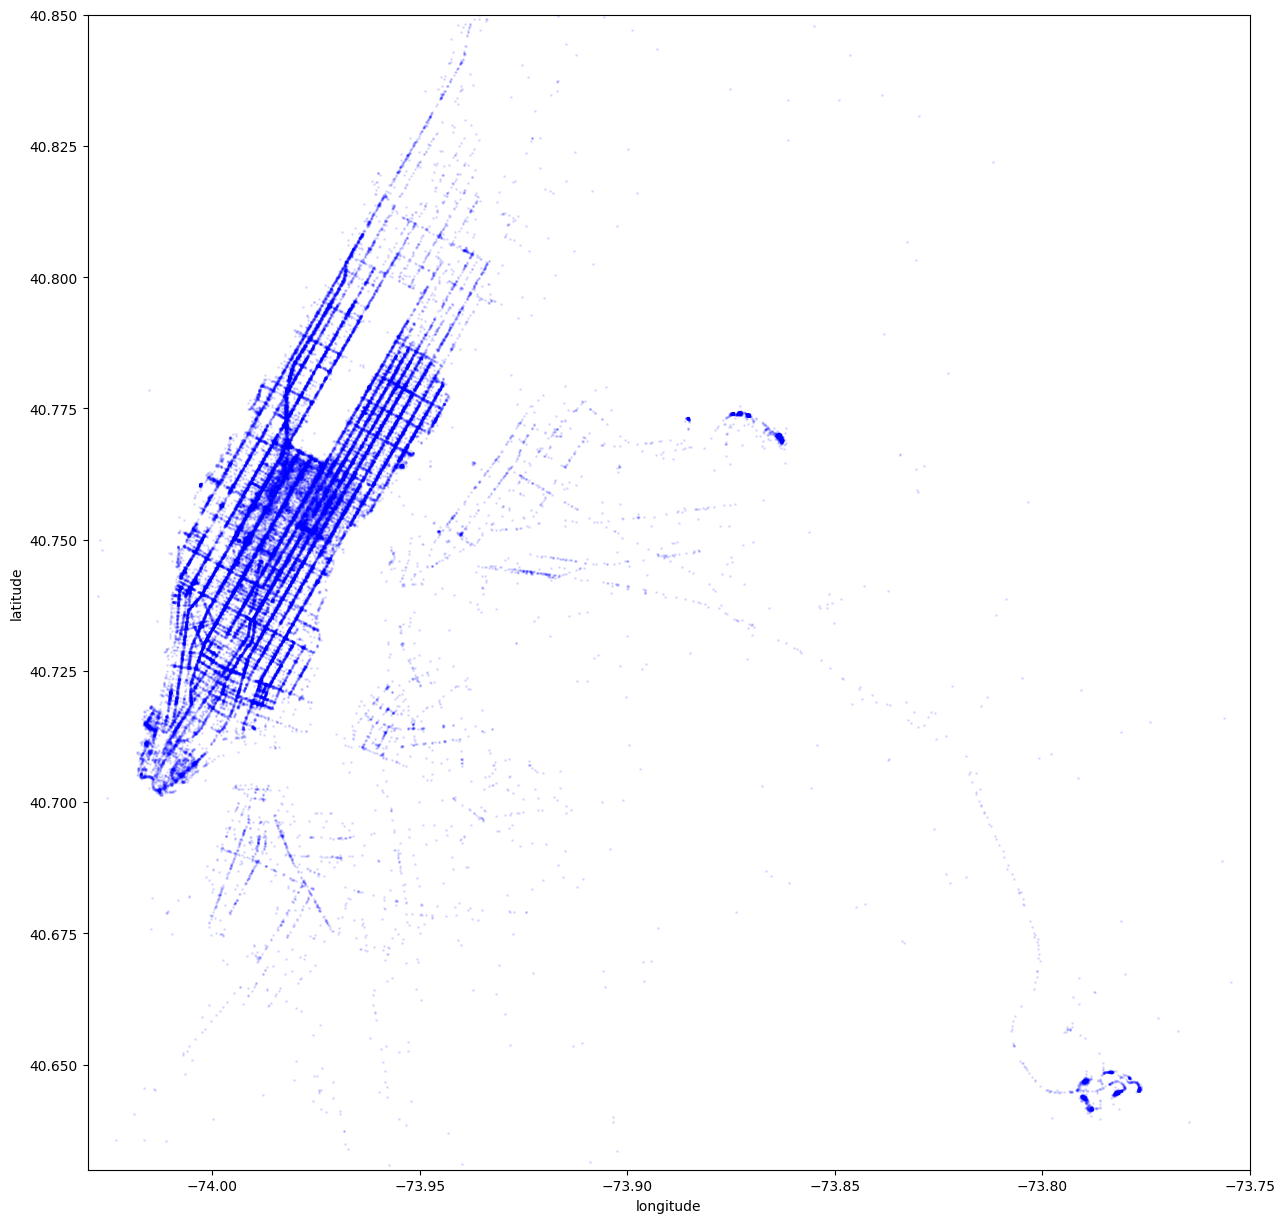

In [ ]:
N = 100000
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.figure(figsize=(15,15))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='blue', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

Теперь нарисуем как следует, на карте.

In [ ]:
!pip  install ipyleaflet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.3 MB/s eta 0:00:00


In [ ]:
from ipyleaflet import Map, Circle, LayerGroup, basemaps

In [ ]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=0.2,
            radius=300,
            stroke=False
        ))
    circles_layer = LayerGroup(layers=circles)
    result_map.add_layer(circles_layer)

    return result_map

In [ ]:
show_circles_on_map(train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

Map(center=[40.750700672149655, -73.97202053833009], controls=(ZoomControl(options=['position', 'zoom_in_text'…

Кстати, случайный ли порядок записей в таблице? Это важно понимать, например, для разбиения выборки на обучающую и тестовую части. Если порядок не является случайным, а мы отнесём к обучающей части первую половину таблицы, то есть риск, что данные в обучении и тесте будут иметь разные распределения, а значит, модель сможет хорошо работать только на одной из частей.

Text(0, 0.5, 'Дней с момента ранней поездки')

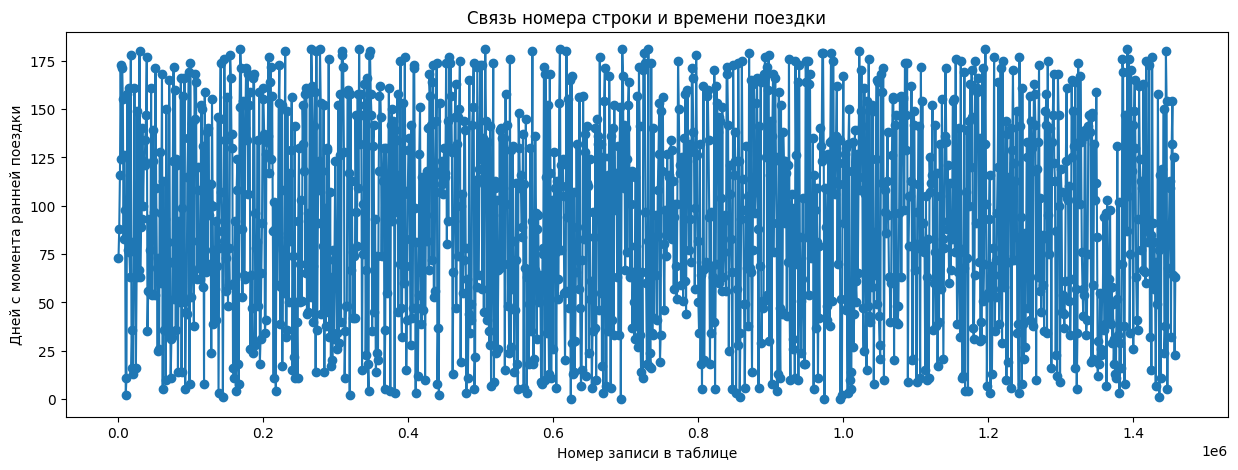

In [ ]:
plt.figure(figsize=(15,5))
days_since_min_ride = (train['pickup_datetime'] - train['pickup_datetime'].min()).apply(lambda x: x.total_seconds() // (60*60*24))
plt.plot(days_since_min_ride[::1000], 'o-')
plt.title('Связь номера строки и времени поездки')
plt.xlabel('Номер записи в таблице')
plt.ylabel('Дней с момента ранней поездки')

Вроде бы всё довольно случайно.

Посчитаем какие-нибудь признаки. Скорее всего продолжительность поездки неплохо зависит от расстояния — посчитаем его. Кстати, важно заметить, что само расстояние не может быть признаком, поскольку в тестовой выборе нет информации о пункте назначения. Но мы пока исследуем данные и, может, увидим в расстояниях что-то интересное.

Можно выбрать научный подход и посчитать честное расстояние на сфере между двумя точками. Это называется [haversine distance](https://en.wikipedia.org/wiki/Haversine_formula).

Можно решить, что Земля плоская, и считать стандартные расстояния. В этом случае очень неплохо подойдёт [манхэттенское расстояние](https://en.wikipedia.org/wiki/Taxicab_geometry) — оно учитывает, что машины всё-таки не летают.

In [ ]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
train.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

Обсудим немного скорость вычислений в pandas. Есть несколько способов применить функцию к каждой строке в таблице. Если вы до этого изучали преимущественно C/C++, то первое, что должно прийти вам в голову, — написать цикл.

In [ ]:
train1 = train.copy()

In [ ]:
%%timeit

for i in range(100):
    train1[i, 'distance_haversine'] = haversine_array(train1['pickup_latitude'].iloc[i],
                                                      train1['pickup_longitude'].iloc[i],
                                                      train1['dropoff_latitude'].iloc[i],
                                                      train1['dropoff_longitude'].iloc[i])

<magic-timeit>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<magic-timeit>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<magic-timeit>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<magic-timeit>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

156 ms ± 5.41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Обратите внимание, что мы посчитали расстояния всего лишь для первых 100 записей, и это уже было не очень быстро.

Можно воспользоваться функцией ```apply```.

In [ ]:
%%timeit

train1.iloc[:5000, :].apply(lambda x:
                            haversine_array(x['pickup_latitude'],
                                            x['pickup_longitude'],
                                            x['dropoff_latitude'],
                                            x['dropoff_longitude']),
                            axis=1)

167 ms ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


За то же самое время мы успеваем обработать уже 5000 записей, а не 100.

Но лучший способ — это векторизовать вычисления. Подробнее об этом мы будем говорить на следующих семинарах.

In [ ]:
%%timeit
train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

143 ms ± 26.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Чуть подробнее об ускорении вычислений можно почитать здесь: https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6

Посмотрим на распределения расстояний.

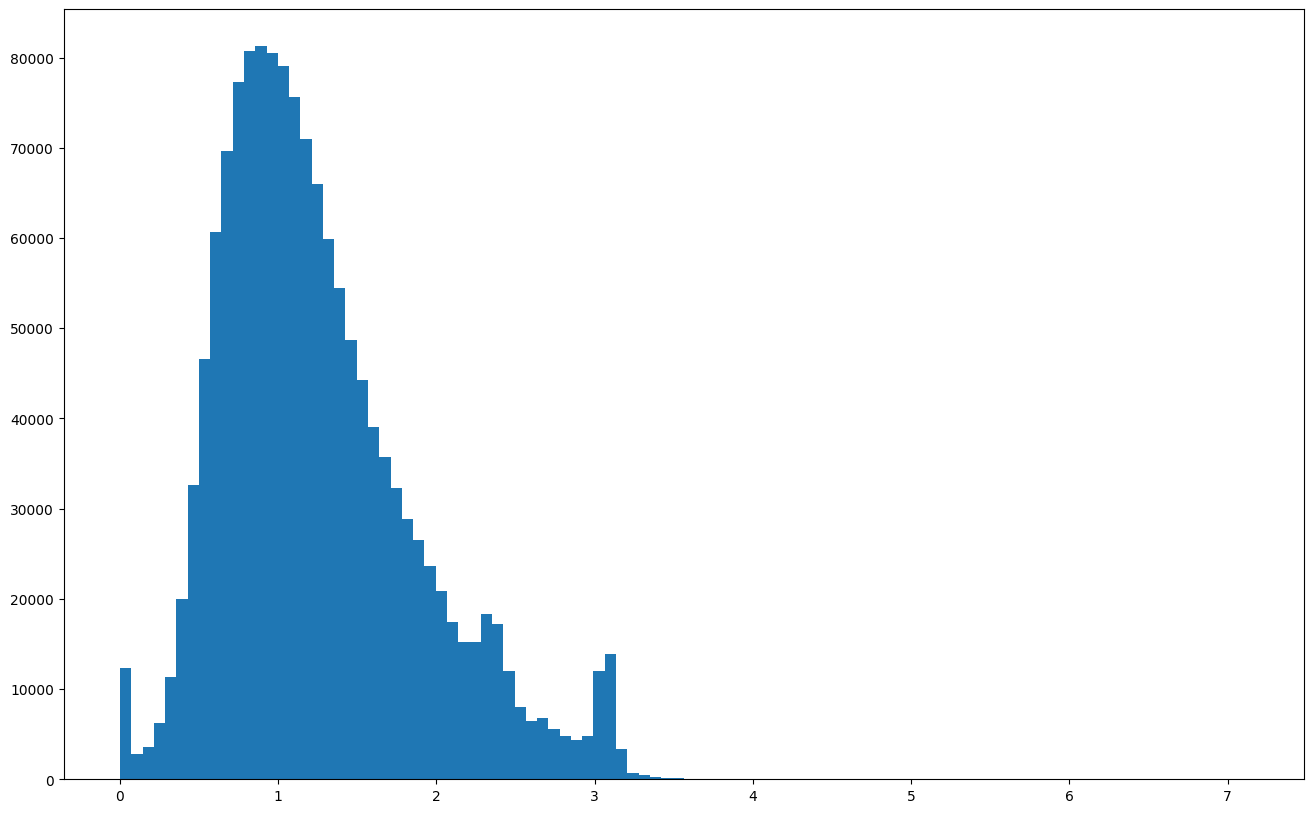

In [ ]:
plt.hist(np.log1p(train.distance_haversine), bins=100)
plt.show()

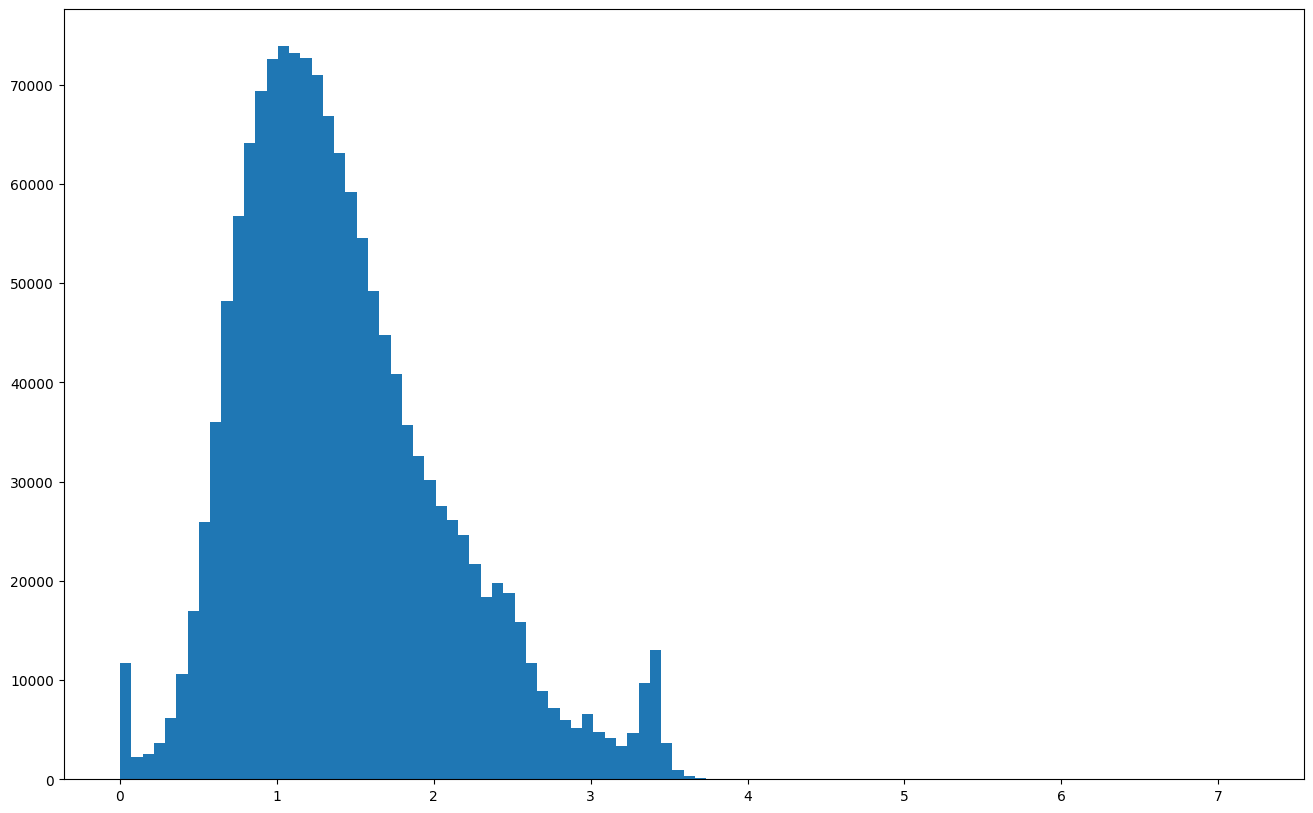

In [ ]:
plt.hist(np.log1p(train.distance_dummy_manhattan), bins=100)
plt.show()

Выглядят достаточно одинаково.

Поисследуем теперь связь между расстоянием и продолжительностью поездки.

Text(0, 0.5, 'trip duration')

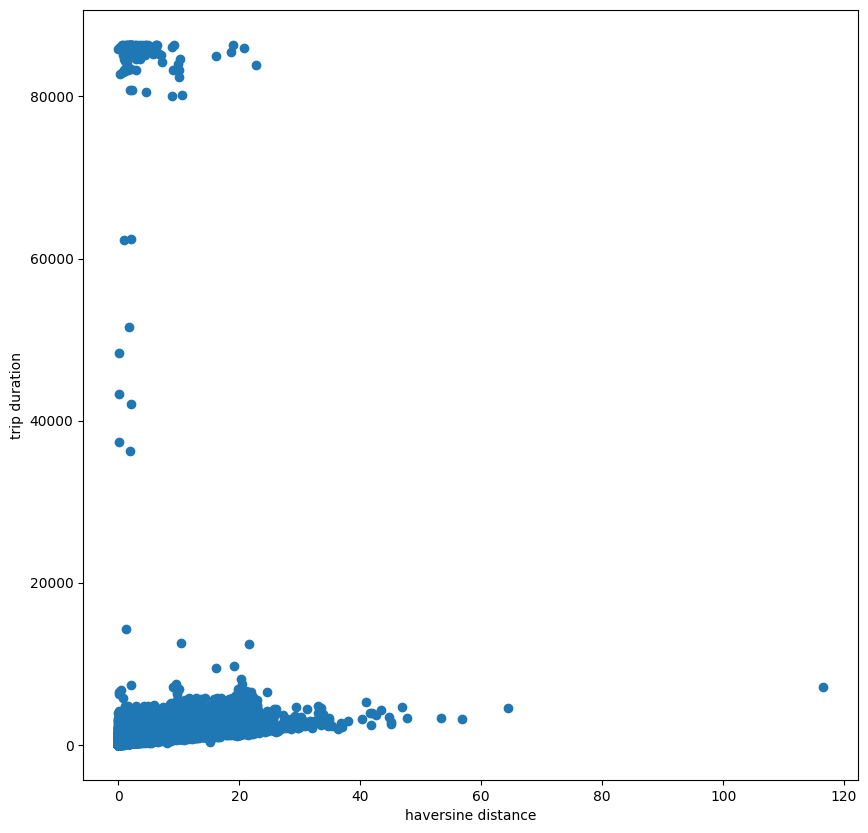

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(train.distance_haversine[:100000], train.trip_duration[:100000], marker='o')
plt.xlabel('haversine distance')
plt.ylabel('trip duration')

В нижней части графика точки неплохо выстраиваются в линию, но ещё есть некоторое количество выбросов. Нарисуем тот же график без них.

Text(0, 0.5, 'trip duration')

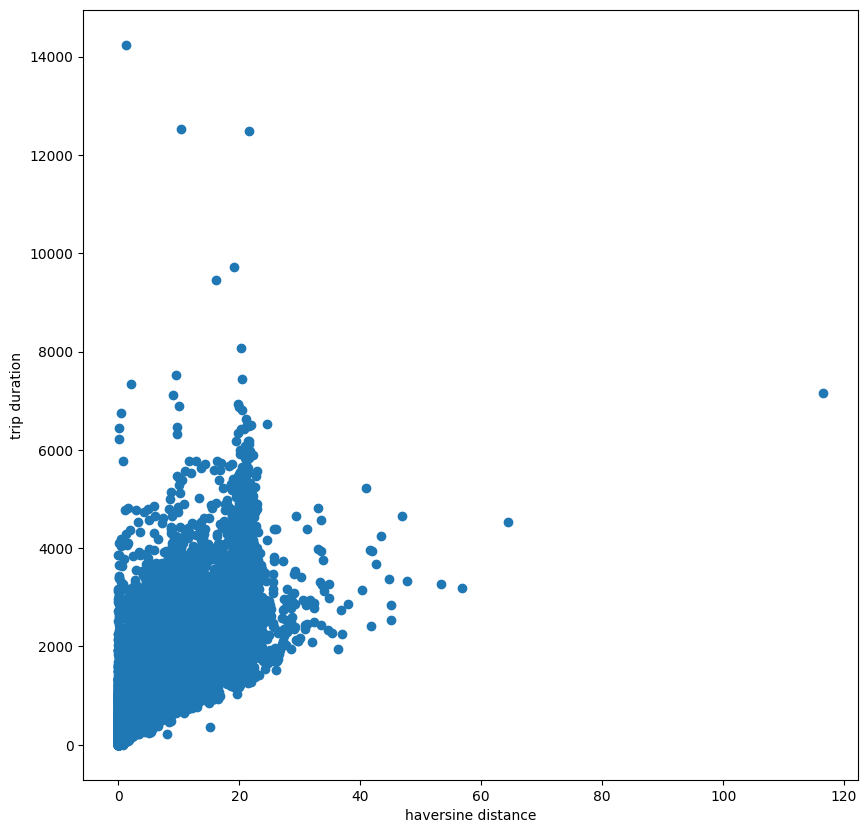

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(train[train.trip_duration < 20000].distance_haversine[:100000],
            train[train.trip_duration < 20000].trip_duration[:100000], marker='o')
plt.xlabel('haversine distance')
plt.ylabel('trip duration')

Кажется, тут вполне может сработать линейная регрессия!

Ещё раз напомним, что расстояние не может быть признаком, его не посчитать для тестовой выборки. Но мы пока просто играемся.

In [ ]:
from sklearn import linear_model, metrics

In [ ]:
train_filtered = train[train.trip_duration < 20000]
X = train_filtered.distance_haversine.values[:, np.newaxis]
y = train_filtered.trip_duration.values

regr = linear_model.Ridge()
regr.fit(X, y)
metrics.mean_absolute_error(regr.predict(X), y)

299.65921803397475

In [ ]:
train_filtered = train[train.trip_duration < 20000]
X = train_filtered.distance_dummy_manhattan.values[:, np.newaxis]
y = train_filtered.trip_duration.values

regr = linear_model.Ridge()
regr.fit(X, y)
metrics.mean_absolute_error(regr.predict(X), y)

306.0326596057465

То есть в среднем модель ошибается где-то на 300 секунд при предсказании продолжительности поездки. Как понять, хорошо это или плохо? Например, сравнить с качеством константной модели — например, которая всегда в качестве прогноза выдаёт медианное или среднее время поездки.

In [ ]:
metrics.mean_absolute_error(np.median(y) * np.ones(y.shape), y)

444.8109724449668

In [ ]:
metrics.mean_absolute_error(np.mean(y) * np.ones(y.shape), y)

468.0349997665766

### Почему важно исследовать данные?

Иногда бывает, что задача сложная, но при этом хорошего качества можно добиться с помощью простых правил. Причины могут быть разные:
* Разметка собрана по простому правилу. Например, для задачи предсказания тональности твитов могли сделать разметку через эмодзи — тогда достаточно, скажем, добавить признак "наличие в тексте подстроки ':)'".
* Задача действительно простая и не требует поиска закономерностей методами машинного обучения.
* В данных есть утечка (leak) — то есть в признаках содержится информация, которая на самом деле не должна быть доступна при построении прогноза.

Про некоторые истории с утечками можно почитать и посмотреть здесь:
* https://dyakonov.org/2018/06/28/простые-методы-анализа-данных/
* https://www.kaggle.com/c/the-icml-2013-whale-challenge-right-whale-redux/discussion/4865
* https://www.youtube.com/watch?v=UOxf2P9WnK8